# Analyzing Video with OpenCV and NumPy

## Task 1: Import libraries

In [29]:
from google.colab import files
uploaded = files.upload()

Saving hot_rod.mp4 to hot_rod.mp4


In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

VFILE = '/content/hot_rod.mp4'
VFILE

'/content/hot_rod.mp4'

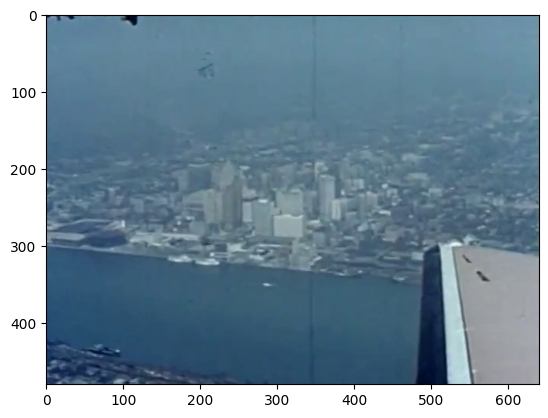

In [35]:
# Create a VideoCapture object
cap = cv2.VideoCapture(VFILE)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")

# Read frames in a loop
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        # Here you can process the frame (e.g., display it or convert it to grayscale, etc.)
        # For example, let's convert the frame to RGB and display it using matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame_rgb)
        plt.show()

        # If you want to only show one frame to test, you can break after the first one
        break
    else:
        # If no frame is returned, we've reached the end of the video
        break

# Release the VideoCapture when done
cap.release()

## Task 1: Define generator for reading video

The function get_frames below is a generator function which intends to return frames from a video file one by one. It's designed to be used in a loop, and it will yield None once there are no more frames to read. This is typical usage for processing video frame by frame. The call of the function will follow in the block after


In [36]:
def get_frames(filename):
  video = cv2.VideoCapture(filename)
  while video.isOpened():
    ret, frame = video.read()
    if ret:
      yield frame #
    else:
      break
  video.release()
  yield None

## Task 2: Retrieve and display video frames

Shape: (480, 640, 3)
Pixel at (0,0): [41 11  0]


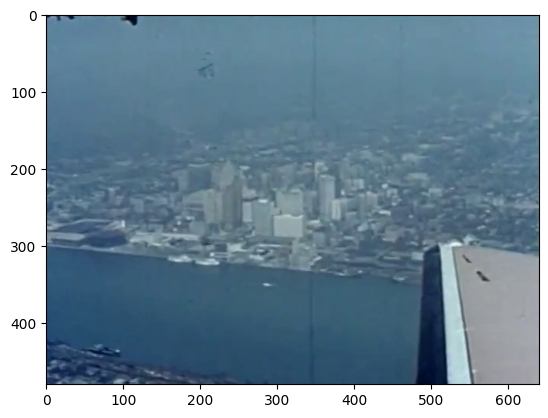

In [47]:
# Create a generator object
frames = get_frames(VFILE)

# Iterate over the generator to get frames
for frame in frames:
    if frame is not None:
        # Process the frame here
        print('Shape:', frame.shape)
        print('Pixel at (0,0):', frame[0, 0, :])
        plt.imshow(frame[..., ::-1])  # Convert BGR to RGB for display
        plt.show()
        break  # If you only want to show the first frame, otherwise remove this line
    else:
        # No more frames are available
        print("No more frames.")
        break

## Task 2: Define function to get a single video frame

In [40]:
def get_frame(filename, index):
    counter = 0
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            if counter == index:
                video.release()
                return frame
            counter += 1
        else:
            break
    video.release()
    return None

## Task 2: Examining pixels

Shape: (480, 640, 3)
Pixel at (0,0): [47 19  0]


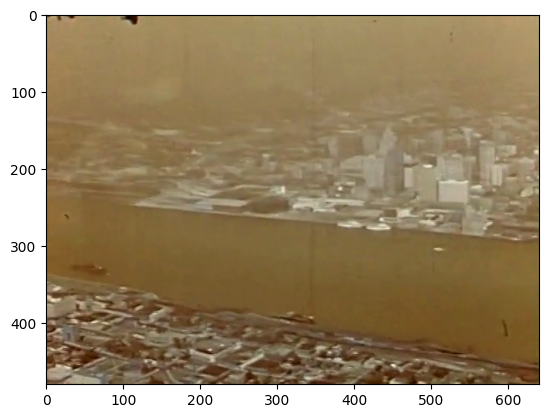

In [41]:
frame = get_frame(VFILE, 80)
if frame is not None:
    print('Shape:', frame.shape)
    print('Pixel at (0,0):', frame[0, 0, :])
    plt.imshow(frame)
    plt.show()
else:
    print("Frame not found.")


## Task 3: Fixing color convention

Pixel at (0,0): [ 0 19 47]


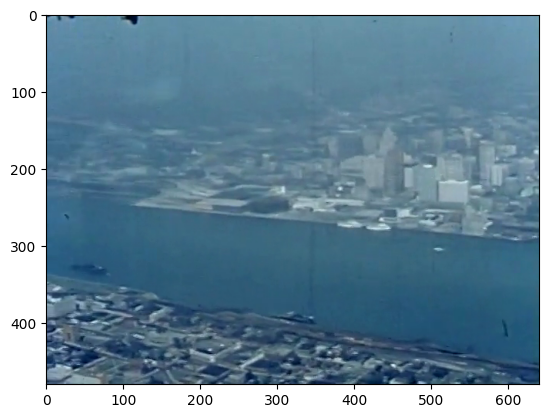

In [42]:
fix_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
print('Pixel at (0,0):', fix_frame[0, 0, :])
plt.imshow(fix_frame)
plt.show()

## Task 3: Cropping a video frame

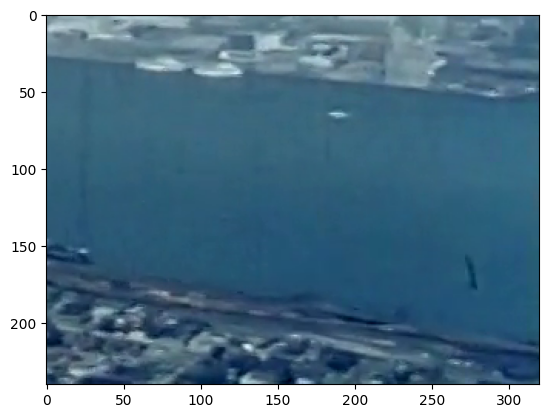

In [43]:
plt.imshow(fix_frame[240:480, 320:640])
plt.show()

## Task 3: Adjusting Brightness

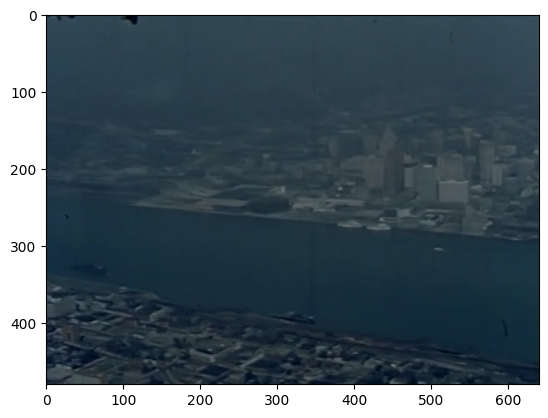

In [44]:
darker = fix_frame * 0.5
darker = darker.astype(np.uint8)
plt.imshow(darker)
plt.show()

## Task 4: Drawing a circle

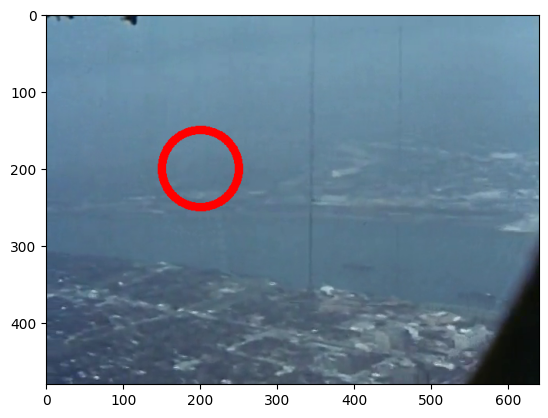

In [46]:
frame = get_frame(VFILE, 200)
cv2.circle(
    frame,
    center =  (200, 200),
    radius =50,
    color = (0, 0, 255),
    thickness = 10
)
fixed_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(fixed_frame)
plt.show()

## Task 4: Processing an entire video

In [ ]:
from google.colab.patches import cv2_imshow as imshow

counter = 0
for frame in get_frames(VFILE):
    if frame is None:  #check we are not at the end of the video
        break
    cv2.putText(frame,
                text = str(counter),
                org = (100, 100),
                fontFace= cv2.FONT_HERSHEY_SIMPLEX,
                fontScale = 1,
                 color = (0, 0, 255),
                thickness= 2)
    imshow( frame)
    if cv2.waitKey(10) == 27:  #ESC button to stop
        break
    counter += 1
    cv2.destroyAllWindows()

## Task 5: Generating a new video file

In [55]:
from google.colab.patches import cv2_imshow as imshow

fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
video_out = cv2.VideoWriter('new.mp4', fourcc, 20.0, (640, 480)) # 20 FPS, 640x480 resolution
counter = 0
for frame in get_frames(VFILE):
    if frame is None:  #check we are not at the end of the video
        break
    cv2.putText(frame,
                text = str(counter),
                org = (100, 100),
                fontFace= cv2.FONT_HERSHEY_SIMPLEX,
                fontScale = 1,
                 color = (0, 0, 255),
                thickness= 2)
    video_out.write(frame)
    counter += 1
video_out.release()

## Task 5: Finding the total frame count

In [56]:
video = cv2.VideoCapture(VFILE)
count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
video.release()
print('frmes count',count)

frmes count 3597
frmes count 3597


## Task 6: Creating a collage

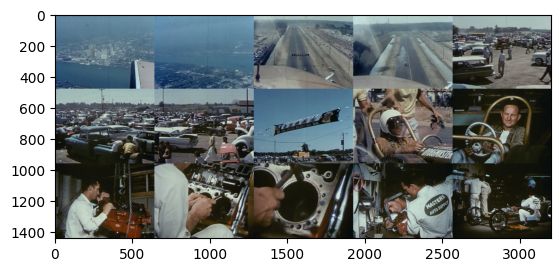

In [57]:
skip_frames = count // 15

frames = []
counter = 0
for f in get_frames(VFILE):
    if counter % skip_frames == 0:
        frames.append(f)
    counter += 1

row1 = np.concatenate(frames[0:5], axis=1)
row2 = np.concatenate(frames[5:10], axis=1)
row3 = np.concatenate(frames[10:15], axis=1)
collage = np.concatenate((row1, row2, row3), axis=0)
collage = cv2.cvtColor(collage, cv2.COLOR_BGR2RGB)  # Color fixation: Convert BGR to RGB for display
plt.imshow(collage)
plt.show()